In [84]:
#Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [85]:
Trainingsets = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-polynomial-regression/Datasets/Position_SalariesTrain.csv")
Testingsets = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-polynomial-regression/Datasets/Position_SalariesTest.csv")
Trainingsets

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Manager,4,80000
3,Region Manager,6,150000
4,Partner,7,200000
5,Senior Partner,8,300000
6,CEO,10,1000000


In [86]:
X_train = Trainingsets.iloc[:,1:2].values
Y_train = Trainingsets.iloc[:,2].values
X_test = Testingsets.iloc[:,1:2].values
Y_test = Testingsets.iloc[:,2].values

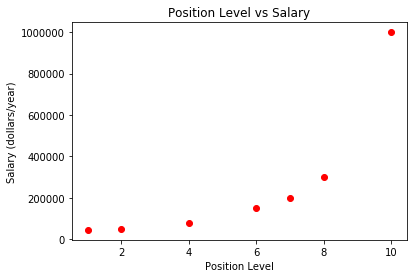

In [87]:
plt.scatter(X_train, Y_train, color = "red")
plt.title("Position Level vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.show()

In [88]:
poly_transform = PolynomialFeatures(degree=4)
X_poly = poly_transform.fit_transform(X_train)

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

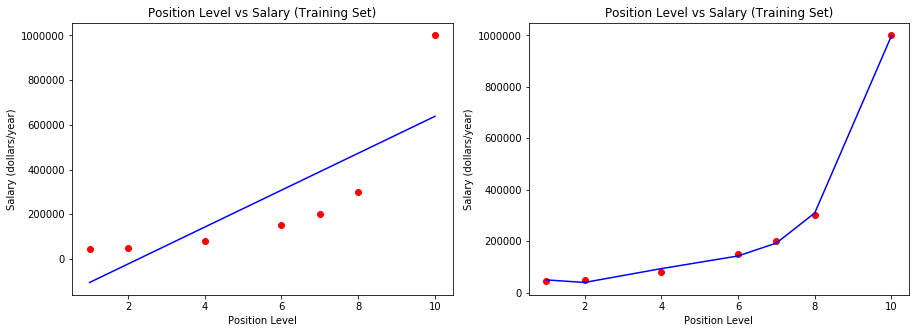

In [91]:
plt.figure(figsize=(15,5))

Y_pred = lin_reg.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(X_train, Y_train, color="red")
plt.plot(X_train, Y_pred, color = "blue")
plt.title("Position Level vs Salary (Training Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

Y_poly_pred = poly_lin_reg.predict(X_poly)
plt.subplot(1,2,2)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, Y_poly_pred, color = "blue")
plt.title("Position Level vs Salary (Training Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.show()

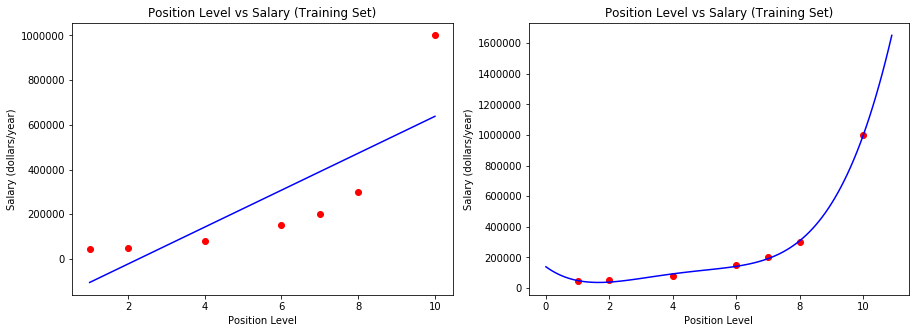

In [92]:
#Visualize Training Set
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Y_pred = lin_reg.predict(X_train)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, Y_pred, color = "blue")
plt.title("Position Level vs Salary (Training Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,2,2)
X_dummy = np.arange(0, 11, 0.1).reshape(-1,1)
X_dummy_poly = poly_transform.transform(X_dummy)
Y_dummy_poly_pred = poly_lin_reg.predict(X_dummy_poly)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_dummy, Y_dummy_poly_pred, color = "blue")
plt.title("Position Level vs Salary (Training Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.savefig("TrainingSet.png",dpi=120)
plt.show()

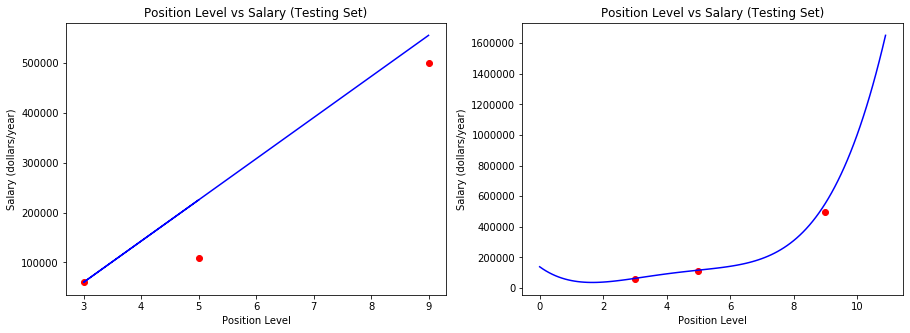

In [93]:
#Visualize Training Set
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
Y_pred = lin_reg.predict(X_test)
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_test, Y_pred, color = "blue")
plt.title("Position Level vs Salary (Testing Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,2,2)
X_dummy = np.arange(0, 11, 0.1).reshape(-1,1)
X_dummy_poly = poly_transform.transform(X_dummy)
Y_dummy_poly_pred = poly_lin_reg.predict(X_dummy_poly)
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_dummy, Y_dummy_poly_pred, color = "blue")
plt.title("Position Level vs Salary (Testing Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.savefig("Testingset.png",dpi=120)
plt.show()

In [94]:
print(lin_reg.score(X_train,Y_train))
print(lin_reg.score(X_test,Y_test))

print(r2_score(Y_train,Y_poly_pred))
X_poly_test = poly_transform.fit_transform(X_test)
Y_poly_pred = poly_lin_reg.predict(X_poly_test)
print(r2_score(Y_test,Y_poly_pred))


0.6310028824447105
0.8588877328994489
0.9992552180215027
0.9755392877149104


In [95]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    x_poly = poly_transform.transform(X_test)
    y = Y_test[i_example]
    y_pred = poly_lin_reg.predict(x_poly)
    print(x, y, y_pred)
    

In [96]:
for i in range(len(X_test)):
    compare(i)

[[9]] 500000 [552670.08013611  63555.47530074 117231.50005633]
[[3]] 60000 [552670.08013611  63555.47530074 117231.50005633]
[[5]] 110000 [552670.08013611  63555.47530074 117231.50005633]
